In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from random import randint

fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

In [2]:
# 1. 
# Determine the number of elements in fruits

fruits.describe() # number of elements or 'n' = 17

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [3]:
#  2. 
#  Output only the index from fruits

fruits.index # RangeIndex(start=0, stop=17, step=1)

RangeIndex(start=0, stop=17, step=1)

In [4]:
# 3.
# Output only the values from fruits

fruits.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

In [5]:
# 4. 
# Confirm the data type of the values in fruits

fruits.dtype # data type is 'objects'

# note the following 'type codes'
'''
'b'       boolean
'i'       (signed) integer
'u'       unsigned integer
'f'       floating-point
'c'       complex-floating point
'O'       (Python) objects
'S', 'a'  (byte-)string
'U'       Unicode
'V'       raw data (void)
'''

"\n'b'       boolean\n'i'       (signed) integer\n'u'       unsigned integer\n'f'       floating-point\n'c'       complex-floating point\n'O'       (Python) objects\n'S', 'a'  (byte-)string\n'U'       Unicode\n'V'       raw data (void)\n"

In [6]:
# 5a. 
# Output only the first five values from fruits. 

fruits.head(5)


0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

In [7]:
# 5b. 
# Output the last three values.

fruits.tail(3)

14    blackberry
15    gooseberry
16        papaya
dtype: object

In [8]:
# 5c.
# Output two random values from fruits

fruits.sample(2)

9        kiwi
8    honeydew
dtype: object

In [9]:
# 6. 
# Run the .describe() on fruits to see what information it returns when called on a Series with string values

fruits.describe()

# returns the series count, unique (strings), top string, and frequency of top string



count       17
unique      13
top       kiwi
freq         4
dtype: object

In [10]:
# 7.
# Run the code necessary to produce only the unique string values from fruits

fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [11]:
# 8.
# Determine how many times each unique string value occurs in fruits

fruits.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

In [12]:
# 9.
# Determine the string value that occurs most frequently in fruits

fruits.mode() #may only work if there is one(1) mode > not sure how this method will handle bimodal, trimodal, etc.

0    kiwi
dtype: object

In [13]:
fruits.value_counts().nlargest(n=1)

kiwi    4
dtype: int64

In [14]:
# 10.
# Determine the string value that occurs least frequently in fruits

lowest_freq_fruits = fruits[(fruits != 'kiwi') & (fruits != 'mango')]
lowest_freq_fruits.value_counts()

strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

In [15]:
fruits.value_counts().nsmallest(n=1, keep='all')

strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

In [16]:
# PART 2: Explore more attributes and methods while you continue to work with the fruits Series.

In [17]:
# 1. Capitalize all the string values in fruits.

fruits.str.upper()

0                 KIWI
1                MANGO
2           STRAWBERRY
3            PINEAPPLE
4           GALA APPLE
5     HONEYCRISP APPLE
6               TOMATO
7           WATERMELON
8             HONEYDEW
9                 KIWI
10                KIWI
11                KIWI
12               MANGO
13           BLUEBERRY
14          BLACKBERRY
15          GOOSEBERRY
16              PAPAYA
dtype: object

In [18]:
# 2. Count the letter "a" in all the string values (use string vectorization)

fruits.str.count('a')
fruits[fruits.str.count('a')] # counting all letter 'a' in each word in the series
# fruits[fruits.str.contains('a')]

sum(fruits.str.count('a')) # counting all letter 'a' in the series 



14

In [19]:
# 3. Output the number of vowels in each and every string value.

# fruits[fruits.str.count('[aeiou]')]
# sum(fruits.str.count('[aeiou]'))

def vowel_count(string):
    counter = 0
    for char in string:
        if char in 'aeiou':
            counter += 1
    return counter

# print(vowel_count('hello')) # should return 2 for two vowels

fruits.apply(vowel_count)


0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [20]:
# 4. Write the code to get the longest string value from fruits.

# notes
# use '.str' attributes 
# use 'len()' string method to determine length character of each string
# extract / find longest string value in series 
# should be 'honeycrisp apple' at 16 characters

# fruits

fruits[fruits.str.len().nlargest(n=1).index]
fruits[fruits.str.len().idxmax()]




'honeycrisp apple'

In [21]:
# 5. Write the code to get the string values with 5 or more letters in the name.

greater_than_5 = fruits.apply(lambda n: "True" if len(n) > 5 else 'False')
fruits[greater_than_5 == 'True']


2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [22]:
# 6. Find the fruit(s) containing the letter "o" two or more times

fruits.str.contains('o')
fruits[(fruits.str.contains('o')) & (fruits.str.count('o')>=2)] 



6         tomato
15    gooseberry
dtype: object

In [23]:
# 7. Write the code to get only the string values containing the substring "berry".

fruits.str.contains('berry')

fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [24]:
# 8. Write the code to get only the string values containing the substring "apple"

apple = fruits.str.contains('apple')
fruits[apple]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [25]:
# 9. Which string value contains the most vowels?

fruits[fruits.str.count('[aeiou]').nlargest(n=1, keep='all')]

5    honeycrisp apple
dtype: object

In [26]:
# 9. alternative approaches

# fruits[fruits.apply(vowel_count).idxmax()]
fruits[fruits.apply(vowel_count).nlargest(n=1)]

5    honeycrisp apple
dtype: object

In [235]:
# PART 3 
import example_letters
from example_letters import letters

In [236]:
letters = pd.Series(letters)
letters

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [29]:
letters.value_counts()

y    13
p    12
w    10
b     9
n     9
k     9
m     9
r     8
a     8
o     8
h     8
x     8
q     8
c     8
d     8
u     7
v     7
t     7
z     7
e     6
f     6
j     6
g     5
i     5
s     5
l     4
dtype: int64

[Text(0.5, 0, 'Letter'), Text(0, 0.5, 'Frequency')]

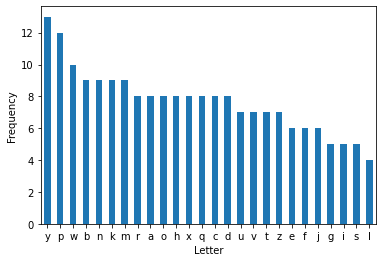

In [30]:
letters.value_counts().plot.bar(rot=0).set(xlabel='Letter', ylabel='Frequency')

In [31]:
# 1. Which letter occurs the most frequently in the letters Series?
letters.value_counts().nlargest(n=1)

# 'y' at 13 is the most frequent letter in the series

y    13
dtype: int64

In [32]:
# 2. Which letter occurs the Least frequently?

letters.value_counts().nsmallest(n=1, keep='all')

# 'l' at 4 is the least frequent letter in the series

l    4
dtype: int64

In [33]:
# alternative method
# letters.value_counts().tail()

In [34]:
# 3. How many vowels are in the Series?

sum(letters.str.count('[aeiou]'))

# there is a total of 34 vowels in the 'letters' series

34

In [239]:
# problem 3 alternative method

vowels = list('aeiou')
letters.isin(vowels).value_counts()

False    166
True      34
dtype: int64

In [35]:
# 4. How many consonants are in the Series?

def consonant_count(string):
    counter = 0
    for char in string:
        if char not in 'aeiou':
            counter += 1
    return counter
            

# print(consonant_count('hello')) should return 3....and does check out!
# now we can pass this created function into our letter series 

sum(letters.apply(consonant_count))

# there is a total of 166 consonants in the 'letters' series
# see above for alternative method -- where 'FALSE' = cosonant

166

In [36]:
# 5. Create a Series that has all of the same letters but uppercased.

uppercased_letters = letters.str.upper()
uppercased_letters

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

[Text(0.5, 0, 'Letter'), Text(0, 0.5, 'Frequency')]

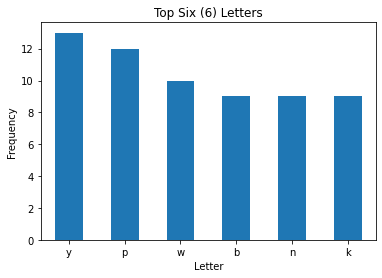

In [37]:
# 6. Create a bar plot of the frequencies of the 6 most commonly occuring letters.

letters.value_counts().head(6).plot.bar(rot=0, title='Top Six (6) Letters').set(xlabel='Letter', ylabel='Frequency')


In [240]:
#  1. What is the data type of the numbers Series?

numbers = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

pd.reset_option('all')
numbers.dtype
# numbers.describe()

# series is an 'object' data type

/Users/mijailmariano/opt/anaconda3/lib/python3.9/site-packages/pandas/_config/config.py:653: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/Users/mijailmariano/opt/anaconda3/lib/python3.9/site-packages/pandas/_config/config.py:653: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


dtype('O')

In [242]:
# returning the total number of ELEMENTS in the series
numbers.size

20

In [39]:
numbers

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

In [40]:
# 2. How many elements are in the number Series?

numbers.describe()
# numbers.index

# there are 20 elements in the series

count              20
unique             20
top       $796,459.41
freq                1
dtype: object

In [41]:
# 3. Perform the necessary manipulations by accessing Series attributes 
# and methods to convert the numbers Series to a numeric data type

numbers_copy = numbers.copy()

In [42]:
numbers_copy = numbers_copy.str.replace('$', '')
numbers_copy

/var/folders/g_/qlnmh4755s7fdtttbj5_0rcw0000gn/T/ipykernel_2305/1149226722.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  numbers_copy = numbers_copy.str.replace('$', '')


0       796,459.41
1           278.60
2       482,571.67
3     4,503,915.98
4      2,121,418.3
5      1,260,813.3
6        87,231.01
7     1,509,175.45
8     4,138,548.00
9     2,848,913.80
10      594,715.39
11    4,789,988.17
12     4,513,644.5
13    3,191,059.97
14    1,758,712.24
15    4,338,283.54
16    4,738,303.38
17    2,791,759.67
18      769,681.94
19      452,650.23
dtype: object

In [43]:
numbers_copy = numbers_copy.str.replace(',', '')
numbers_copy

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4      2121418.3
5      1260813.3
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12     4513644.5
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: object

In [243]:
numbers_copy = numbers_copy.astype('float')
numbers_copy.dtype # series type successfully changed from 'object' to 'float'

dtype('float64')

In [45]:
#  4. Run the code to discover the maximum value from the Series.

numbers_copy.max()

# max value in the series: 478998817.0
# alternative -- can also use numbers_copy.nlargest(n=1) syntax

4789988.17

In [46]:
# 5. Run the code to discover the minimum value from the Series.

numbers_copy.min()
# min value in the series: 27860.0
# alternatively -- can also use numbers_copy.nsmallest(n=1) syntax

278.6

In [47]:
#  6. What is the range of the values in the Series?

num_range = numbers_copy.between(left=278.60, right=478998817.0)
max_limit = numbers_copy[num_range].max()
min_limit = numbers_copy[num_range].min()

print(f'series min: {min_limit} -- series max: {max_limit}')

min series range: 278.6 -- max series range: 4789988.17


In [48]:
numbers_copy.describe()

count    2.000000e+01
mean     2.284406e+06
std      1.735261e+06
min      2.786000e+02
25%      7.259403e+05
50%      1.940065e+06
75%      4.188482e+06
max      4.789988e+06
dtype: float64

In [49]:
# 7. Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin

# bin expression = pd.cut(s, bins=n)

lst_of_bins = [278.59, 1197428, 2394856, 3592284, 4789988.17]
numbers_binned = pd.cut(numbers_copy, lst_of_bins)
numbers_binned


0         (278.59, 1197428.0]
1         (278.59, 1197428.0]
2         (278.59, 1197428.0]
3     (3592284.0, 4789988.17]
4      (1197428.0, 2394856.0]
5      (1197428.0, 2394856.0]
6         (278.59, 1197428.0]
7      (1197428.0, 2394856.0]
8     (3592284.0, 4789988.17]
9      (2394856.0, 3592284.0]
10        (278.59, 1197428.0]
11    (3592284.0, 4789988.17]
12    (3592284.0, 4789988.17]
13     (2394856.0, 3592284.0]
14     (1197428.0, 2394856.0]
15    (3592284.0, 4789988.17]
16    (3592284.0, 4789988.17]
17     (2394856.0, 3592284.0]
18        (278.59, 1197428.0]
19        (278.59, 1197428.0]
dtype: category
Categories (4, interval[float64, right]): [(278.59, 1197428.0] < (1197428.0, 2394856.0] < (2394856.0, 3592284.0] < (3592284.0, 4789988.17]]

In [50]:
numbers_binned.value_counts()

# bin distribution
'''
(278.59, 1197428.0]        7
(3592284.0, 4789988.17]    6
(1197428.0, 2394856.0]     4
(2394856.0, 3592284.0]     3
'''

'\n(278.59, 1197428.0]        7\n(3592284.0, 4789988.17]    6\n(1197428.0, 2394856.0]     4\n(2394856.0, 3592284.0]     3\n'

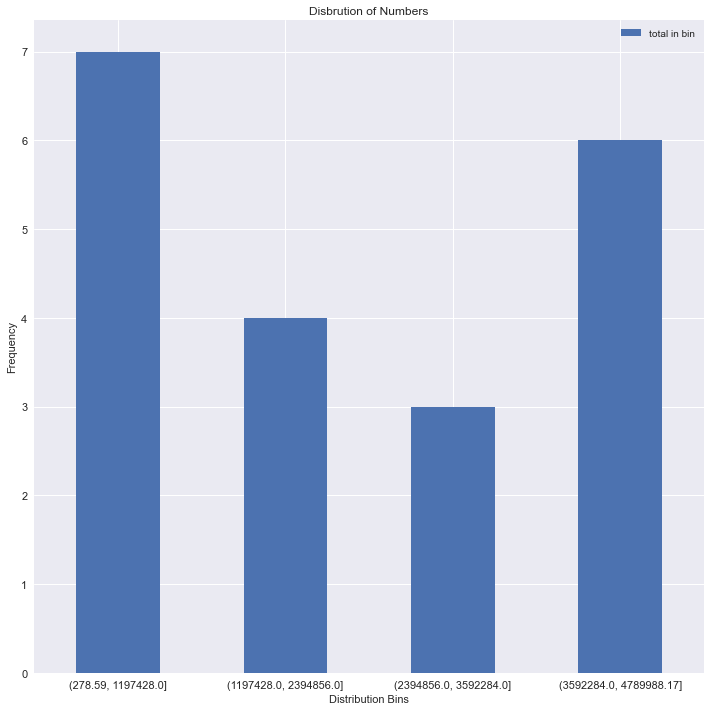

In [245]:
# 8. Plot the binned data in a meaningful way. Be sure to include a title and axis labels.

plt.figure(figsize= (12, 12))
plt.style.use('seaborn')

numbers_binned.value_counts().sort_index().plot.bar(rot='0', fontsize=11, title='Disbrution of Numbers', label='bins').set(xlabel='Distribution Bins', ylabel='Frequency')

plt.legend(['total in bin'], loc='upper right')

In [61]:
# Use pandas to create a Series named exam_scores from the following list:

exam_scores = [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]

In [62]:
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [69]:
# 1. How many elements are in the exam_scores Series?

exam_scores.count()

# there are 20 elements/exam scores in the series

20

In [100]:
# 2. Run the code to discover the minimum, the maximum, the mean, and the median scores for the exam_scores Series.

print((f'exam score min: {exam_scores.min()}'))
print((f'exam score max: {exam_scores.max()}'))
print((f'exam score mean: {exam_scores.mean()}'))
print((f'exam score median: {exam_scores.median()}'))

exam score min: 60
exam score max: 96
exam score mean: 78.15
exam score median: 79.0


In [216]:
del exam_scores_copy

In [221]:
exam_scores

0     60
1     86
2     75
3     62
4     93
5     71
6     60
7     83
8     95
9     78
10    65
11    72
12    69
13    81
14    96
15    80
16    85
17    92
18    82
19    78
dtype: int64

In [222]:
exam_scores_copy = exam_scores.copy

In [224]:
# 3. Plot the Series in a meaningful way and make sure your chart has a title and axis labels.
exam_scores_copy.value_counts()

60    2
78    2
82    1
95    1
93    1
92    1
86    1
85    1
83    1
81    1
62    1
80    1
75    1
72    1
71    1
69    1
65    1
96    1
dtype: int64

<AxesSubplot:title={'center':'History Exam Recap'}, xlabel='Exam Scores', ylabel='Frequency'>

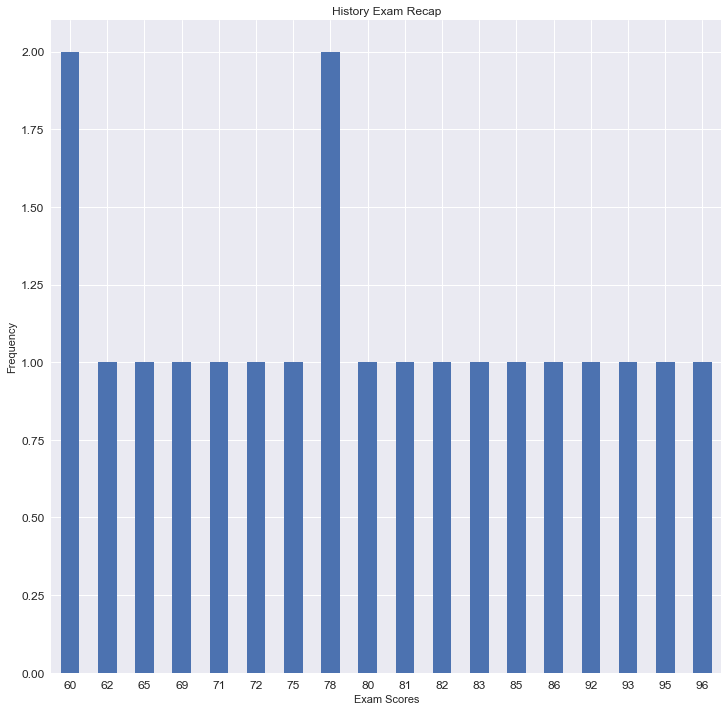

In [225]:
# notes
# above I've sorted the 'exam_scores_copy' series by values (exam scores)
# I want to plot the series titled, 'exam_scores_copy'
# include x and y labels

plt.figure(figsize= (12, 12))
exam_scores_copy.value_counts().sort_index().plot.bar(rot=0,fontsize=12, title='History Exam Recap', xlabel='Exam Scores', ylabel='Frequency')

In [233]:
# 4. Write the code necessary to implement a curve for your exam_grades Series and save this as curved_grades.
# Add the necessary points to the highest grade to make it 100
# and add the same number of points to every other score in the Series as well.

print(100 - exam_scores_copy.max())
curved_grades = exam_scores_copy.add(4)
curved_grades


4


0      64
6      64
3      66
10     69
12     73
5      75
11     76
2      79
9      82
19     82
15     84
13     85
18     86
7      87
16     89
1      90
17     96
4      97
8      99
14    100
dtype: int64

In [234]:
curved_grades.value_counts()

64     2
82     2
86     1
99     1
97     1
96     1
90     1
89     1
87     1
85     1
66     1
84     1
79     1
76     1
75     1
73     1
69     1
100    1
dtype: int64

<AxesSubplot:>

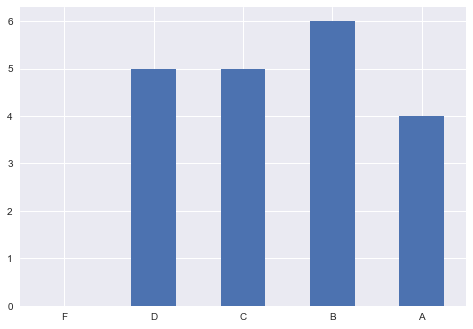

In [252]:
#  5. Use a method to convert each of the numeric values in the curved_grades Series into a categorical value of letter grades. 
# For example, 86 should be a 'B' and 95 should be an 'A'. 
# Save this as a Series named letter_grades.

# can use a 'bin' method to do this...

binned_scores = pd.cut(exam_scores_copy, bins=[0, 50, 69, 79, 89, 100], labels=['F', 'D', 'C', 'B', 'A']).value_counts().sort_index().plot.bar(rot=0)
binned_scores